In [ ]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn.preprocessing import MinMaxScaler
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
train=pd.read_csv("/content/train (1).csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test=pd.read_csv("/content/test (1).csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:

train.drop(["Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis='columns',inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [ ]:
test.drop(["Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis='columns',inplace=True)


In [ ]:
test

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875
...,...,...,...,...,...
413,1305,3,male,NaN,8.0500
414,1306,1,female,39.0,108.9000
415,1307,3,male,38.5,7.2500
416,1308,3,male,NaN,8.0500


In [ ]:
gender = {'male': 0,'female': 1}
test.Sex = [gender[item] for item in test.Sex]
print(test)

     PassengerId  Pclass  Sex   Age      Fare
0            892       3    0  34.5    7.8292
1            893       3    1  47.0    7.0000
2            894       2    0  62.0    9.6875
3            895       3    0  27.0    8.6625
4            896       3    1  22.0   12.2875
..           ...     ...  ...   ...       ...
413         1305       3    0  27.0    8.0500
414         1306       1    1  39.0  108.9000
415         1307       3    0  38.5    7.2500
416         1308       3    0  27.0    8.0500
417         1309       3    0  27.0   22.3583

[418 rows x 5 columns]


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [ ]:
eg_av=train['Age'].median()
eg_av
train['Age'].fillna( eg_av,inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
dtype: int64

In [ ]:
ege_av=test['Age'].median()
test['Age'].fillna( ege_av,inplace=True)

In [ ]:
f_av=test['Fare'].median()
test['Fare'].fillna( f_av,inplace=True)

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [ ]:
gender = {'male': 0,'female': 1}
train.Sex = [gender[item] for item in train.Sex]
print(train)

     PassengerId  Survived  Pclass  Sex   Age     Fare
0              1         0       3    0  22.0   7.2500
1              2         1       1    1  38.0  71.2833
2              3         1       3    1  26.0   7.9250
3              4         1       1    1  35.0  53.1000
4              5         0       3    0  35.0   8.0500
..           ...       ...     ...  ...   ...      ...
886          887         0       2    0  27.0  13.0000
887          888         1       1    1  19.0  30.0000
888          889         0       3    1  28.0  23.4500
889          890         1       1    0  26.0  30.0000
890          891         0       3    0  32.0   7.7500

[891 rows x 6 columns]


In [ ]:
x=train.iloc[:,2:6]
y=train.iloc[:,[1]]

In [ ]:
x

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,28.0,23.4500
889,1,0,26.0,30.0000


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   random_state= 5)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model2 = GaussianNB()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print('GaussianNB ',metrics.accuracy_score(y_pred2, y_test, sample_weight=None))

GaussianNB  0.8044692737430168


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC
model3 = SVC(kernel='rbf')
model3.fit(x_train,y_train,)
y_pred3 = model3.predict(x_test)
print('SVC ',metrics.accuracy_score(y_pred3, y_test, sample_weight=None))

SVC  0.7094972067039106


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(x_train, y_train)
y_pred4 = rf_model.predict(x_test)
print('RandomForest ',metrics.accuracy_score(y_pred4, y_test, sample_weight=None))

RandomForest  0.8491620111731844


<ipython-input-29-c1d9f8893aa2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(2,input_dim=4,activation="softmax"))

In [ ]:
model.compile(loss='*',optimizer='adam',metrics='accuracy')

In [ ]:
h=model.fit(x_train,y_train,epochs=100,verbose=1,validation_data=[x_test,y_test])

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 2.9558 - accuracy: 0.6152 - val_loss: 2.6394 - val_accuracy: 0.6201
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1.7270 - accuracy: 0.6152 - val_loss: 1.2922 - val_accuracy: 0.6201
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8907 - accuracy: 0.5927 - val_loss: 0.6770 - val_accuracy: 0.6648
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.6278 - val_loss: 0.6440 - val_accuracy: 0.6872
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.6489 - val_loss: 0.6345 - val_accuracy: 0.7095
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6629 - val_loss: 0.6286 - val_accuracy: 0.7151
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6643 - val_loss: 0.6226 - val_accuracy: 0.7095
Epoch 8/100


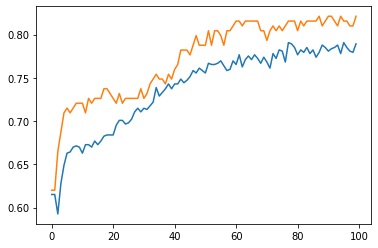

In [ ]:
plot.plot(h.history['accuracy'])
plot.plot(h.history['val_accuracy'])

In [ ]:
x_t=test.iloc[:,1:5]
x_t

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875
...,...,...,...,...
413,3,0,27.0,8.0500
414,1,1,39.0,108.9000
415,3,0,38.5,7.2500
416,3,0,27.0,8.0500


In [ ]:
y_predict = rf_model.predict(x_t)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result=pd.DataFrame(data=test['PassengerId'],columns=['PassengerId'])

In [ ]:
result['Survived']=y_predict
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
